In [18]:
import seaborn as sns
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
import pandas as pd
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
data1 = pd.read_csv('taiwan_data.csv')
labels = data1.iloc[:,-1]   # Enregistrer la varialbe target
data1 = data1.iloc[:,0:-1]; # Enleveer la colonne target

In [19]:
data1.drop(columns=["PAY_5","PAY_6","BILL_AMT2",
       "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"],inplace=True)

In [20]:
data1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,3913,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,2682,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,29239,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,46990,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,8617,2000,36681,10000,9000,689,679


# Scaling of numerical Attributes

In [23]:
col_to_norm = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
data1[col_to_norm] = data1[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [24]:
data1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-0.642501,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,-0.659219,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,-0.298560,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,-0.057491,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,-0.578618,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [78]:
reduced_data = PCA(n_components=15).fit_transform(data1)
reduced_num = pd.DataFrame(reduced_data)

In [56]:
def KMENAS(data):
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(data);
    val = pd.crosstab(labels,kmeans.labels_).values
    return pd.crosstab(labels,kmeans.labels_)

In [80]:
reduced_num.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.419148,-1.071202,0.078941,0.666327,-0.899517,0.243108,0.083514,0.078746,-0.354274,0.705803,0.195220,-1.489465,1.979681,0.478404,0.814302
1,-0.889206,-0.839330,1.168892,0.547916,-0.671901,-0.163743,-0.096342,0.007758,-0.017323,0.107501,0.070481,0.116944,-0.754004,0.176433,1.484243
2,-0.490057,-0.730255,0.609998,0.484894,-0.589543,-0.236070,-0.148161,-0.100701,0.060005,0.003414,0.030323,0.630557,-0.039277,-0.160467,-0.001818
3,-0.518508,-0.643242,-0.810577,0.499548,-0.773371,0.320887,0.094074,-0.080150,-0.231409,0.211658,-0.059620,-0.454825,0.021921,-0.641980,-0.043573
4,0.576146,0.026825,-2.173136,0.763152,1.797283,0.502465,0.386748,-0.071504,-0.615819,0.380979,0.873568,0.703852,-0.233542,-1.037293,0.165504


In [61]:
KMENAS(reduced_num)

col_0,0,1
default payment next month,,
0,8957,14407
1,1576,5060


In [33]:
def Test(data,eps,min_points):
    clustering = DBSCAN(eps=eps, min_samples=min_points).fit(data)
    return pd.crosstab(labels,clustering.labels_)
    clustering.labels_

In [70]:
Test(reduced_num,2.000000000000100000000000001,30)

col_0,-1,0,1
default payment next month,,,
0,2419,12986,7959
1,480,3523,2633


In [74]:
def Hierchical_clustering_Viz(data):
    #générer la matrice des distances 
    Z = linkage(data,method='ward')
    #affichage du dendrogramme 
    plt.title("CHA") 
    dendrogram(Z,labels=data.index,orientation='left',color_threshold=0) 
    plt.show()
def Hierchical_clustering_decoupage(data,num):
    Z = linkage(data,method='ward')
    # matérialisation des deux classes (hauteur t = num) 
    plt.title('CAH avec matérialisation des 2 classes') 
    dendrogram(Z,labels=data.index,orientation='left',color_threshold=num) 
    plt.show()

    #découpage à la hauteur t = num==> identifiants de 2 groupes obtenus 
    groupes_cah = fcluster(Z,t=num,criterion='distance') 
    print(groupes_cah)

    #index triés des groupes 
    idg = np.argsort(groupes_cah)

    #affichage des observations et leurs groupes
    print(pd.DataFrame(data.index[idg],groupes_cah[idg]))
    return pd.crosstab(labels,groupes_cah)

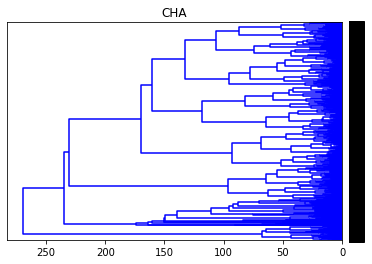

In [75]:
Hierchical_clustering_Viz(reduced_num)

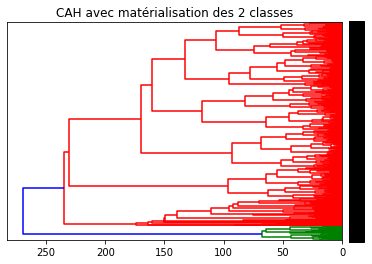

[2 2 2 ... 2 2 2]
        0
1   15512
1    2434
1    6509
1    9811
1   17483
1   17484
1   17485
1   23918
1    2447
1    2432
1   23919
1   23926
1    6492
1    2458
1   27704
1    2461
1    9820
1    2463
1   27701
1    9815
1    9821
1    2431
1   13400
1   20867
1   20866
1    2392
1   17446
1    9781
1   13421
1    2402
..    ...
2   10320
2   10321
2   10322
2   10349
2   10348
2   10347
2   10346
2   10345
2   10344
2   10343
2   10342
2   10341
2   10340
2   10339
2   10336
2   10335
2   10334
2   10333
2   10332
2   10331
2   10330
2   10329
2   10328
2   10327
2   10326
2   10325
2   10324
2   10323
2   10351
2   29999

[30000 rows x 1 columns]


col_0,1,2
default payment next month,,
0,701,22663
1,1342,5294


In [77]:
Hierchical_clustering_decoupage(reduced_num,250)